# A neural network for a binary classification

## import library

In [360]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm
import os
from tqdm import tqdm

## load data

In [361]:
directory_data  = './'
filename_data   = 'assignment_03_data.npz'
path_data       = os.path.join(directory_data, filename_data) 
data            = np.load(path_data)

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

In [362]:
print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (10000, 28, 28)
size of y_train : (10000,)
*************************************************
size of x_test : (1800, 28, 28)
size of y_test : (1800,)
*************************************************
number of training image : 10000
height of training image : 28
width of training image : 28
*************************************************
number of testing image : 1800
height of testing image : 28
width of testing image : 28
*************************************************


## convert data into numpy array

In [363]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test  = np.asarray(x_test)
y_test  = np.asarray(y_test)

## plot grey image

In [364]:
def plot_image(title, data):

    nRow = 2
    nCol = 4
    size = 4
    
    fig, axes = plt.subplots(nRow, nCol, figsize=(size * nCol, size * nRow))
    fig.suptitle(title, fontsize=16)
    
    for i in range(nRow):
        for j in range(nCol):

            k = i * nCol + j
            axes[i, j].imshow(data[k], cmap='gray', vmin=0, vmax=1)

    plt.tight_layout()
    plt.show()

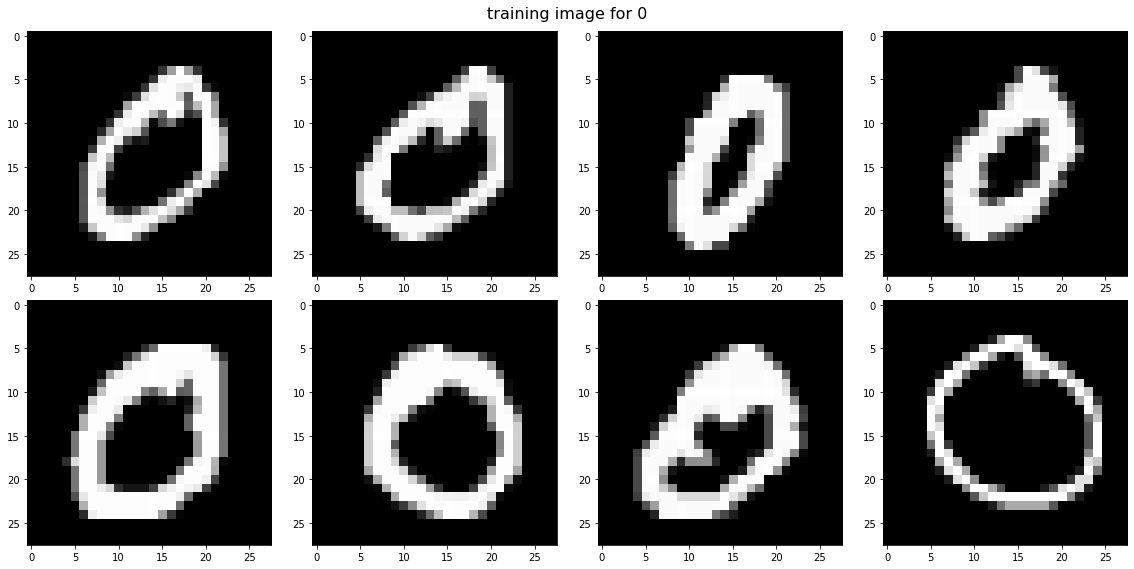

In [365]:
plot_image('training image for 0', x_train)

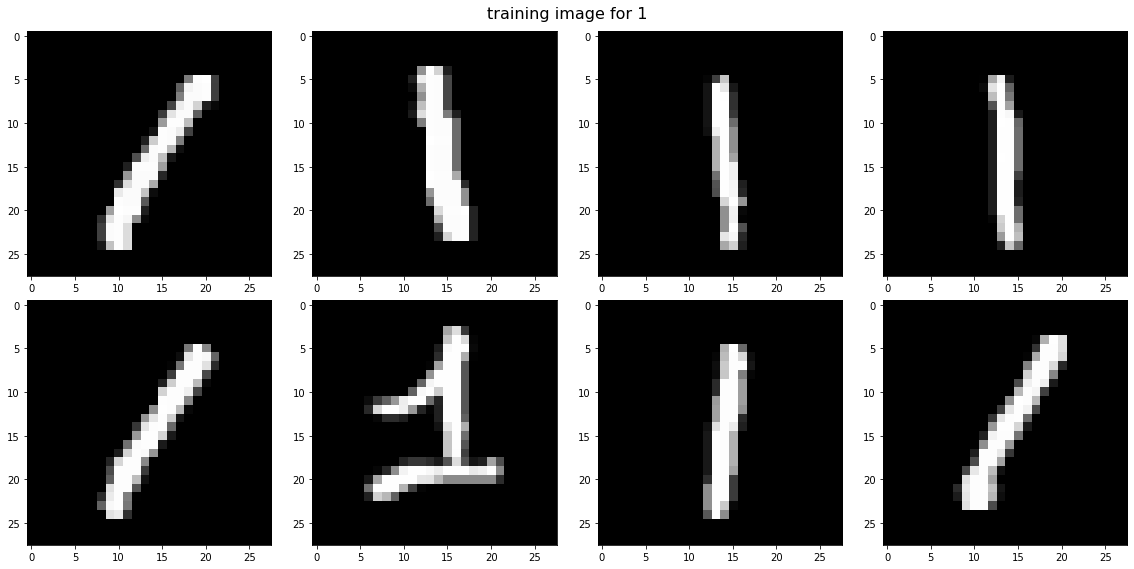

In [366]:
plot_image('training image for 1', x_train[5000:,:,:])

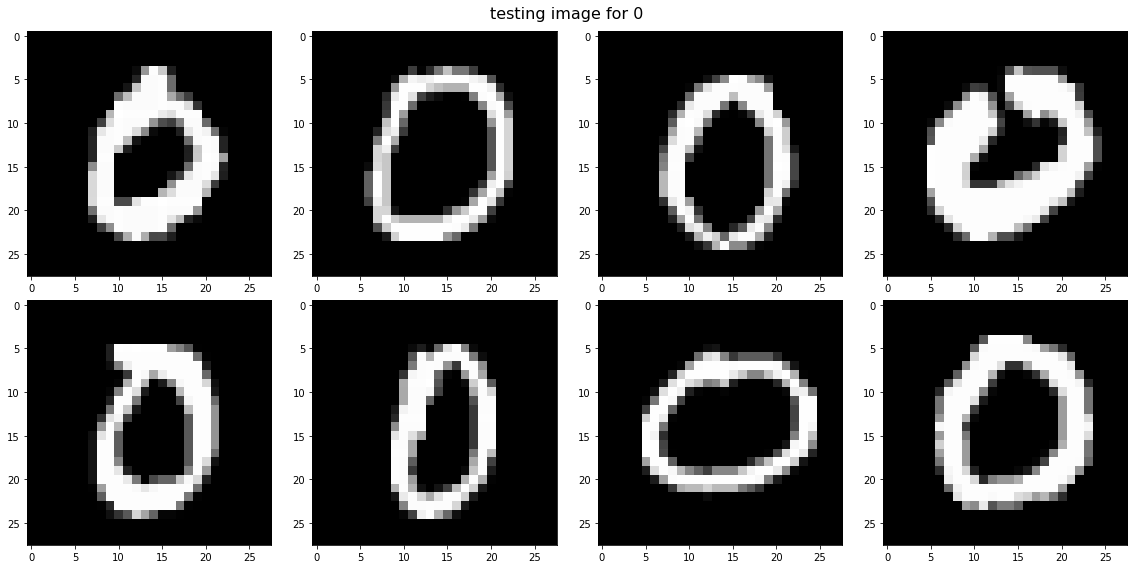

In [367]:
plot_image('testing image for 0', x_test)

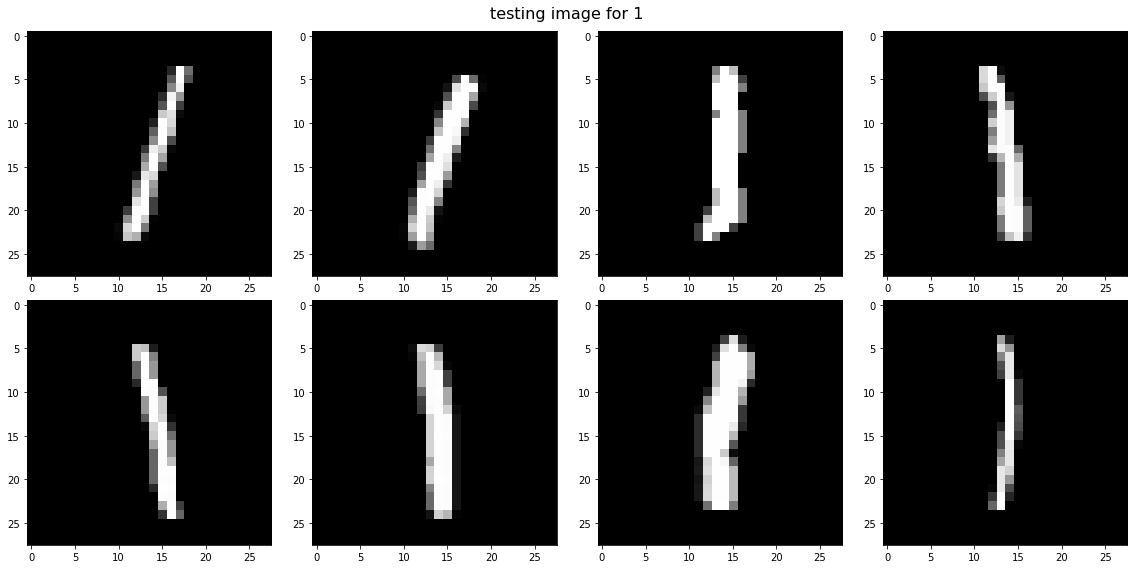

In [368]:
plot_image('testing image for 1', x_test[900:])

## reshape input data

- vectorize input image matrices into vectors (row-major order)

In [369]:
vec_x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vec_x_test  = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [370]:
print('size of training input :', vec_x_train.shape)
print('size of training output :', y_train.shape)

print('size of testing input :', vec_x_test.shape)
print('size of testing output :', y_test.shape)

size of training input : (10000, 784)
size of training output : (10000,)
size of testing input : (1800, 784)
size of testing output : (1800,)


In [371]:
x_train = vec_x_train.transpose()
x_test  = vec_x_test.transpose()

length_data         = x_train.shape[0]
number_data_train   = x_train.shape[1]
number_data_test    = x_test.shape[1]

y_train.reshape(1, number_data_train)
y_test.reshape(1, number_data_test)

array([[0., 0., 0., ..., 1., 1., 1.]])

In [372]:
print('size of training input :', x_train.shape)
print('size of training output :', y_train.shape)

print('size of testing input :', x_test.shape)
print('size of testing output :', y_test.shape)

print('number of training data :', number_data_train)
print('number of testing data :', number_data_test)

size of training input : (784, 10000)
size of training output : (10000,)
size of testing input : (784, 1800)
size of testing output : (1800,)
number of training data : 10000
number of testing data : 1800


## reshape the ground truth

In [373]:
index_train_0 = np.where(y_train == 0)[0]
index_train_1 = np.where(y_train == 1)[0]

index_test_0 = np.where(y_test == 0)[0]
index_test_1 = np.where(y_test == 1)[0]

In [374]:
print('size of ground truth for 0 in the training :', index_train_0.shape)
print('size of ground truth for 1 in the training :', index_train_1.shape)

print('size of ground truth for 0 in the testing :', index_test_0.shape)
print('size of ground truth for 1 in the testing :', index_test_1.shape)

size of ground truth for 0 in the training : (5000,)
size of ground truth for 1 in the training : (5000,)
size of ground truth for 0 in the testing : (900,)
size of ground truth for 1 in the testing : (900,)


## initialize the neural network

- neural network consists of fullly connected linear layer followed by sigmoid activation function
- the size of the fully connected layer is input 784 and output 1

## initialize the weights for the fully connected layer

- create one matrix for the weights

In [375]:
size_input  = length_data 
size_output = 1

weight = np.ones((size_output, size_input))

In [376]:
print('size of the weight :', weight.shape)

size of the weight : (1, 784)


## define neural network 

### define sigmoid function 

In [377]:
def activation_sigmoid(input):

# ================================================== 
# fill up the blank
#
    output = np.exp(-1 * input)
    output = 1 / (1+output)
#
# ================================================== 
    return output 

In [378]:
def derivative_sigmoid(input):

# ================================================== 
# fill up the blank
#
    output = activation_sigmoid(input)*(1-activation_sigmoid(input))
#
# ================================================== 
    return output

### define the layer

- $n$ : the number of data
- input : $784 \times n$
- output : $1 \times n$

In [379]:
def layer_fully_connected(input, weight):

# ================================================== 
# fill up the blank
#
    output = np.matmul(weight, input)
#
# ================================================== 
    return output

## define forward propagation

In [380]:
def compute_prediction(input, weight):

# ================================================== 
# fill up the blank
#
    output = layer_fully_connected(input, weight)
    prediction  = activation_sigmoid(output)
#
# ==================================================     
    return prediction 

## define the loss function

- cross entropy between the ground truth and the prediction
- cross entropy : $-y \log(h) - (1-y) \log(1-h)$
  - $y$ : grount truth
  - $h$ : prediction
- output dimension : $1 \times 1$

In [381]:
def compute_loss(prediction, label):

# ================================================== 
# fill up the blank
#
    loss = -1*label*np.log(prediction) - (1-label)*np.log(1-prediction)
#
# ==================================================
    return loss

## compute the accuracy

- note that iterations over the input data are not allowed inside the function

In [382]:
def compute_accuracy(prediction, label):

# ================================================== 
# fill up the blank
#    

    accuracy = np.sum(np.where(prediction>=0.5,1,0)==label)/len(label)
#
# ==================================================
    return accuracy

## compute the gradient with respect to the weights

- note that iterations over the input data are not allowed inside the function
- size of input : $m \times n$
- size of label : $1 \times n$
- size of prediction : $1 \times n$
- $n$ denotes the number of data
- $m$ denotes the length of each data

In [383]:
def compute_gradient_weight(input, label, prediction):

# ================================================== 
# fill up the blank
#    

    residual = prediction - label
    
    gradient = np.matmul(input, residual.T)
    gradient = gradient/input.shape[0]
# ==================================================
    return gradient

## gradient descent algorithm

- hyper-parameters

In [384]:
number_iteration    = 500
learning_rate       = 0.01
weight              = weight * 0.01

## variables for storing intermediate results

In [385]:
accuracy_train  = np.zeros(number_iteration)
accuracy_test   = np.zeros(number_iteration)

loss_train_mean = np.zeros(number_iteration)
loss_train_std  = np.zeros(number_iteration)
loss_test_mean  = np.zeros(number_iteration)
loss_test_std   = np.zeros(number_iteration)

prediction_train_0_mean = np.zeros(number_iteration)
prediction_train_0_std  = np.zeros(number_iteration)
prediction_train_1_mean = np.zeros(number_iteration)
prediction_train_1_std  = np.zeros(number_iteration)
prediction_test_0_mean  = np.zeros(number_iteration)
prediction_test_0_std   = np.zeros(number_iteration)
prediction_test_1_mean  = np.zeros(number_iteration)
prediction_test_1_std   = np.zeros(number_iteration)


## run the gradient descent algorithm

In [386]:
for i in tqdm(range(number_iteration)):

# ================================================== 
# fill up the blank
#    
    # prediction 계산
    # accuracy 계산
    # gradient 계산
    # weight 업데이트
    pred_train = compute_prediction(x_train, weight)


    grad_train = compute_gradient_weight(x_train, y_train, pred_train)
    weight = weight - learning_rate*grad_train.T

    pred_test = compute_prediction(x_test, weight)
    #("pred_test", pred_test)
    loss_train = compute_loss(pred_train, y_train)
    loss_test = compute_loss(pred_test, y_test)
    
    acc_train = compute_accuracy(pred_train, y_train)
    acc_test = compute_accuracy(pred_test, y_test)
    #print("train accuracy: ", train_accuracy)
    #print("test accuracy:",test_accuracy)
    
    
#
# ==================================================
    accuracy_train[i]   = acc_train
    accuracy_test[i]    = acc_test
    
    loss_train_mean[i]  = np.mean(loss_train)
    loss_train_std[i]   = np.std(loss_train)
    loss_test_mean[i]   = np.mean(loss_test)
    loss_test_std[i]    = np.std((loss_test))

    prediction_train_0_mean[i]  = np.mean(pred_train[:,index_train_0])
    prediction_train_0_std[i]   = np.std(pred_train[:,index_train_0])
    prediction_train_1_mean[i]  = np.mean(pred_train[:,index_train_1])
    prediction_train_1_std[i]   = np.std(pred_train[:,index_train_1])
    prediction_test_0_mean[i]   = np.mean(pred_test[:,index_test_0])
    prediction_test_0_std[i]    = np.std(pred_test[:,index_test_0])
    prediction_test_1_mean[i]   = np.mean(pred_test[:,index_test_1])
    prediction_test_1_std[i]    = np.std(pred_test[:,index_test_1])

100%|██████████| 500/500 [01:09<00:00,  7.21it/s]


---

## functions for presenting the results

---

In [387]:
def function_result_01():

    title           = 'loss (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_train_mean)), loss_train_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_train_mean)), loss_train_mean - loss_train_std, loss_train_mean + loss_train_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [388]:
def function_result_02():

    title           = 'loss (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_test_mean)), loss_test_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_test_mean)), loss_test_mean - loss_test_std, loss_test_mean + loss_test_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [389]:
def function_result_03():

    title           = 'prediction for 0 (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_train_0_mean)), prediction_train_0_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_train_0_mean)), prediction_train_0_mean - prediction_train_0_std, prediction_train_0_mean + prediction_train_0_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [390]:
def function_result_04():

    title           = 'prediction for 1 (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_train_1_mean)), prediction_train_1_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_train_1_mean)), prediction_train_1_mean - prediction_train_1_std, prediction_train_1_mean + prediction_train_1_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [391]:
def function_result_05():

    title           = 'prediction for 0 (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_test_0_mean)), prediction_test_0_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_test_0_mean)), prediction_test_0_mean - prediction_test_0_std, prediction_test_0_mean + prediction_test_0_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [392]:
def function_result_06():

    title           = 'prediction for 1 (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_test_1_mean)), prediction_test_1_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_test_1_mean)), prediction_test_1_mean - prediction_test_1_std, prediction_test_1_mean + prediction_test_1_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [393]:
def function_result_07():

    title           = 'accuracy (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_train)), accuracy_train, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [394]:
def function_result_08():

    title           = 'accuracy (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_test)), accuracy_test, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [395]:
def function_result_09():

    print('final training loss = %6.5f' % (loss_train_mean[-1]))

In [396]:
def function_result_10():

    print('final testing loss = %6.5f' % (loss_test_mean[-1]))

In [397]:
def function_result_11():

    print('final training accuracy = %6.5f' % (accuracy_train[-1]))

In [398]:
def function_result_12():

    print('final testing accuracy = %6.5f' % (accuracy_test[-1]))

---

## results 

---


################################################################################
#
# RESULT # 01
#
################################################################################



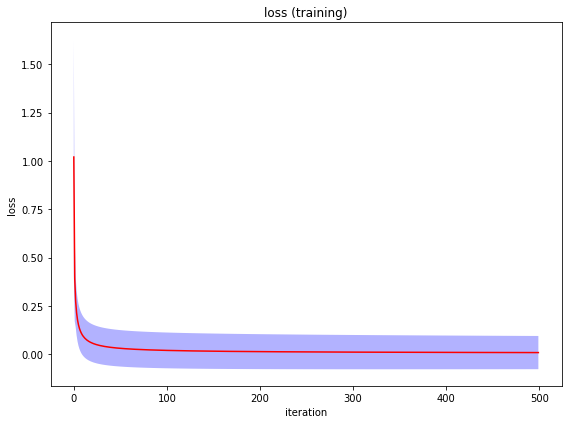


################################################################################
#
# RESULT # 02
#
################################################################################



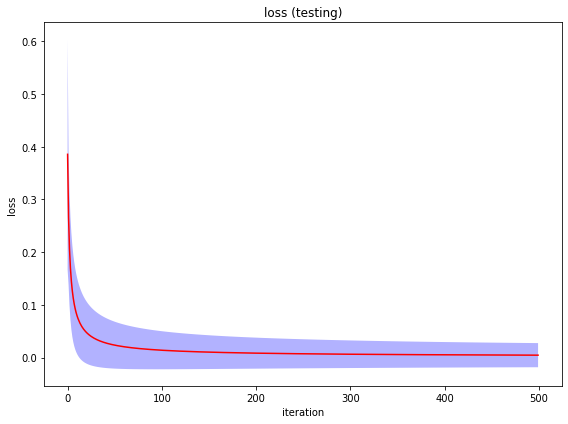


################################################################################
#
# RESULT # 03
#
################################################################################



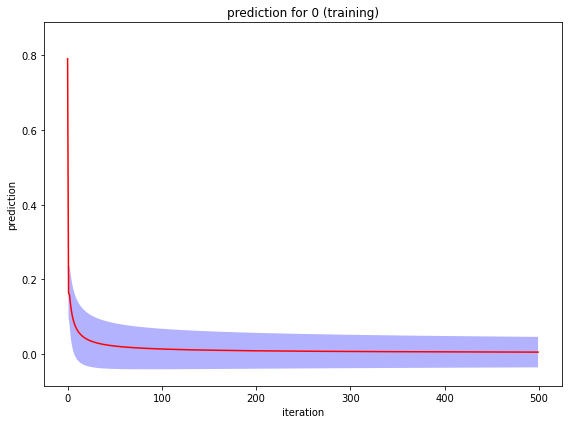


################################################################################
#
# RESULT # 04
#
################################################################################



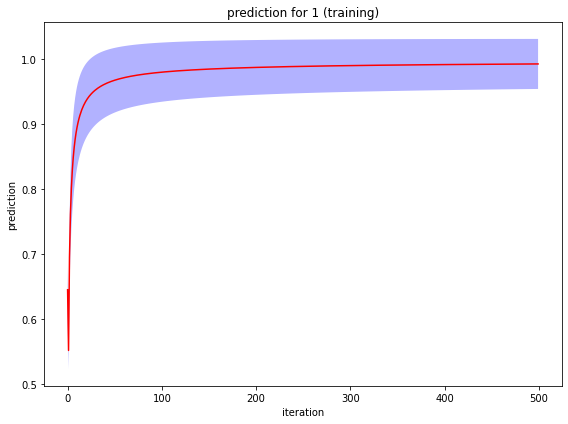


################################################################################
#
# RESULT # 05
#
################################################################################



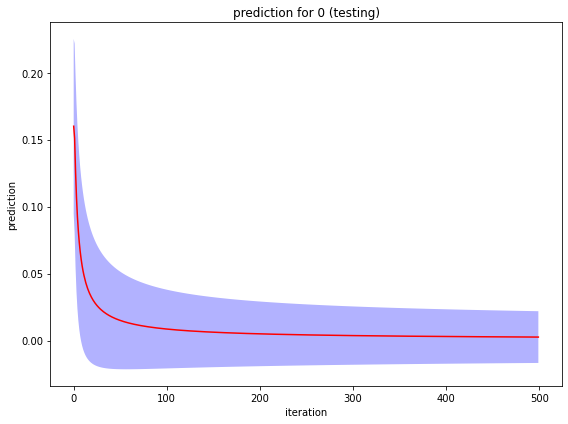


################################################################################
#
# RESULT # 06
#
################################################################################



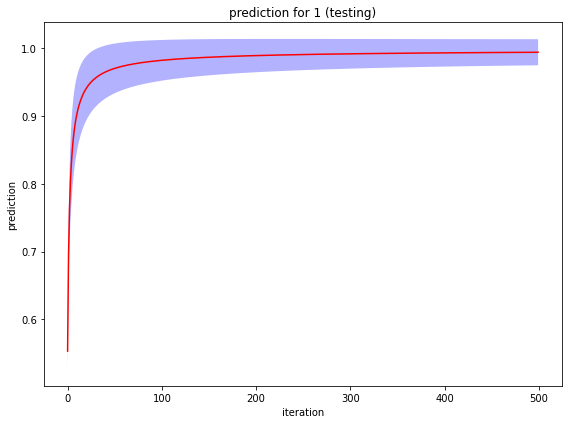


################################################################################
#
# RESULT # 07
#
################################################################################



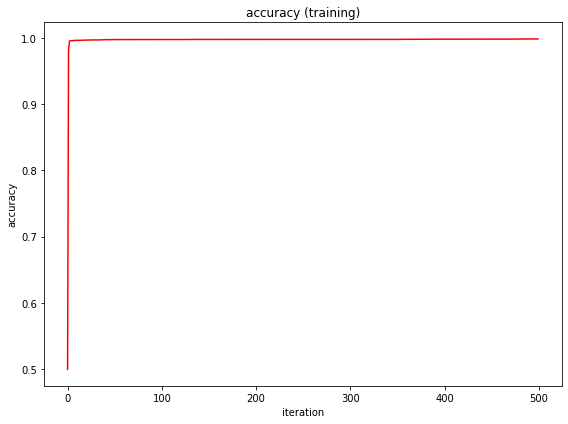


################################################################################
#
# RESULT # 08
#
################################################################################



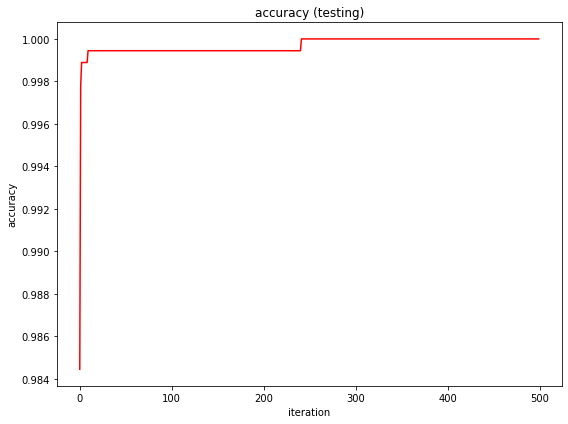


################################################################################
#
# RESULT # 09
#
################################################################################

final training loss = 0.00856

################################################################################
#
# RESULT # 10
#
################################################################################

final testing loss = 0.00450

################################################################################
#
# RESULT # 11
#
################################################################################

final training accuracy = 0.99820

################################################################################
#
# RESULT # 12
#
################################################################################

final testing accuracy = 1.00000


In [399]:
number_result = 12 

for i in range(number_result):

    title           = '# RESULT # {:02d}'.format(i+1) 
    name_function   = 'function_result_{:02d}()'.format(i+1)

    print('') 
    print('################################################################################')
    print('#') 
    print(title)
    print('#') 
    print('################################################################################')
    print('') 

    eval(name_function)